In [1]:
%matplotlib inline

In [2]:
from scipy.constants import c, pi, physical_constants
Z0 = physical_constants['characteristic impedance of vacuum'][0]
from scipy.special import ellipk
epsilon_silicon = 11.9

In [42]:
# For the meaning of u1, u2, and kt, see p. 47 of Gao's thesis.

def u1(a, b, t):
    d = 2 * t / pi
    return a + d * (1 / 2 + 3 * np.log(2) / 2 - 1 / 2 * np.log(d / a) + 1 / 2 * np.log(b - a / (a + b)))

def u2(a, b, t):
    d = 2 * t / pi
    return b + d * (-1 / 2 - 3 * np.log(2) / 2 + 1 / 2 * np.log(d / b) - 1 / 2 * np.log(b - a / (a + b)))

# The capacitance per unit length of a zero-thickness CPW, divided by epsilon_0
def C_zero(k, epsilon_substrate):
    epsilon_eff = (1 + epsilon_substrate) / 2
    return epsilon_eff * 4 * ellipk(k**2) / ellipk(1 - k**2)

# The half-capacitance per unit length of a thickness t CPW, divided by epsilon_0
def C_half(a, b, t, epsilon):
    kt = u1(a, b, t) / u2(a, b, t)
    return 2 * epsilon * ellipk(kt**2) / ellipk(1 - kt**2)

# Gao says this is the best approximation.
# Return half the capacitance of a thickness t CPW in vacuum plus half that of a zero-thickness CPW on the substrate
def C_best(a, b, t, epsilon_substrate):
    return C_half(a=a, b=b, t=t, epsilon=1) + C_zero(k=a/b, epsilon_substrate=epsilon_substrate)

# The inductance per unit length of a zero-thickness CPW, divided by mu_0
def L_zero(k):
    return ellipk(1 - k**2) / (4 * ellipk(k**2))

# The half inductance per unit length of a thickness t CPW, divided by mu_0; relative permeability 1 assumed
def L_half(a, b, t):
    kt = u1(a, b, t) / u2(a, b, t)
    return ellipk(1 - kt**2) / (2 * ellipk(kt**2))

# The total inductance per unit length of two t / 2 thickness CPWs in parallel, divided by mu_0; relative permeability 1 assumed
def L_best(a, b, t):
    return 1 / 2 * L_half(a=a, b=b, t=t/2)

In [45]:
C_color = 'red'
L_color = 'blue'
active_marker = 'o'
inactive_marker = 's'

(0, 1)

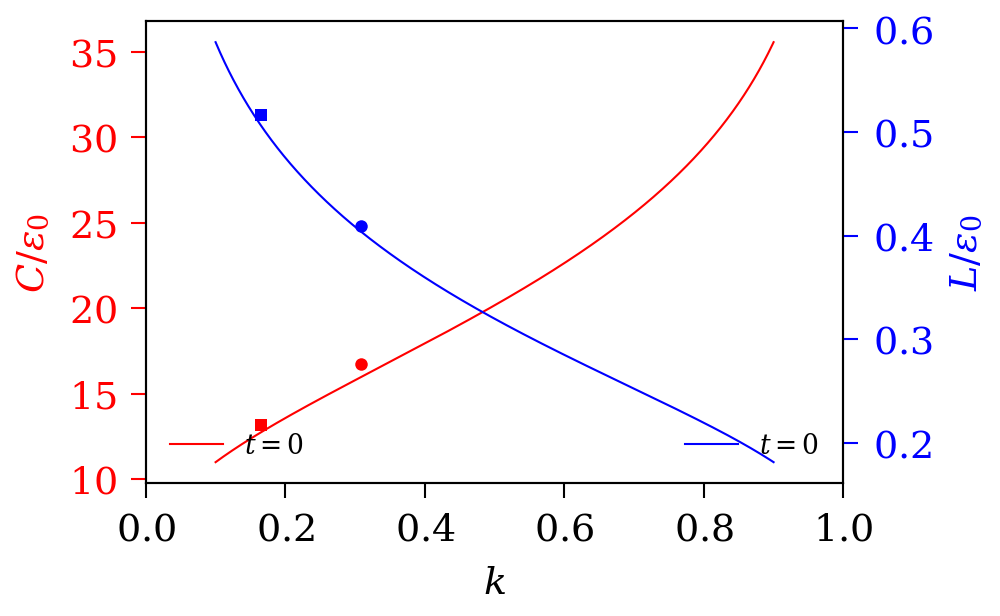

In [60]:
# k = a / b should range from about 5 / 35 = 0.14 to 2 / 7 = 0.3 in our CPWs
w_active = 4
g_active = 5
a_active = w_active / 2
b_active = a_active + g_active
k_active = a_active / b_active
t_active = 40e-3
kt_active = u1(a=a_active, b=b_active, t=t_active) / u2(a=a_active, b=b_active, t=t_active)

w_inactive = 10
g_inactive = 30
a_inactive = w_inactive / 2
b_inactive = a_inactive + g_inactive
k_inactive = a_inactive / b_inactive
t_inactive = 200e-3
kt_inactive = u1(a=a_inactive, b=b_inactive, t=t_inactive) / u2(a=a_inactive, b=b_inactive, t=t_inactive)

bb = 1
aa = np.linspace(0.1, 0.9, 1000)

fig, C_ax = plt.subplots()
L_ax = C_ax.twinx()

C_ax.plot(aa / bb,
          C_zero(k=aa/bb, epsilon_substrate=epsilon_silicon),
          color=C_color,
          label='$t = 0$')
L_ax.plot(aa / bb,
          L_zero(k=aa/bb),
          color=L_color,
          label='$t = 0$')

C_ax.plot([kt_active],
          [C_best(a=a_active, b=b_active, t=t_active, epsilon_substrate=epsilon_silicon)],
          marker=active_marker, color=C_color)
C_ax.plot([kt_inactive],
          [C_best(a=a_inactive, b=b_inactive, t=t_inactive, epsilon_substrate=epsilon_silicon)],
          marker=inactive_marker, color=C_color)

L_ax.plot([kt_active],
          [L_best(a=a_active, b=b_active, t=t_active)],
          marker=active_marker, color=L_color)
L_ax.plot([kt_inactive],
          [L_best(a=a_inactive, b=b_inactive, t=t_inactive)],
          marker=inactive_marker, color=L_color)

C_ax.set_xlabel('$k$')
C_ax.set_ylabel('$C / \epsilon_0$', color=C_color)
L_ax.set_ylabel('$L / \epsilon_0$', color=L_color)

C_ax.tick_params(axis='y', color=C_color, labelcolor=C_color)
L_ax.tick_params(axis='y', color=L_color, labelcolor=L_color)

C_ax.legend(fontsize='xx-small', loc='lower left')
L_ax.legend(fontsize='xx-small', loc='lower right')

C_ax.set_xlim(0, 1)
#C_ax.set_ylim(0, 40)
#L_ax.set_ylim(0, 0.8)